# 线性回归入门

## 安装并使用包

切换清华镜像源

In [1]:
options(repos=structure(c(CRAN="https://mirrors.tuna.tsinghua.edu.cn/CRAN/"))) 

MASS:支持Venables和Ripley的函数和数据集   
ISLR:R中应用统计学习入门的数据

In [2]:
#install.packages("ISLR")

In [3]:
#install.packages("MASS")

加载包并删除全部变量

In [4]:
library(MASS)
library(ISLR)
rm(list=ls())

# 简单线性回归
查看变量名词

In [5]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

做线性回归，`lm()`为线性回归模型，`~`前为被解释变量，`~`后为自变量

In [6]:
lm.fit=lm(medv~lstat,data = Boston)

显示回归结果

In [7]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [8]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


找出存储在回归结果中的其他信息

In [9]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

返回参数

In [10]:
lm.fit$coefficient

(Intercept)       lstat 
 34.5538409  -0.9500494

In [11]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

返回拟合的置信区间

In [12]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


预测数值并给出置信区间

In [13]:
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


画散点图并画出集拟合的直线

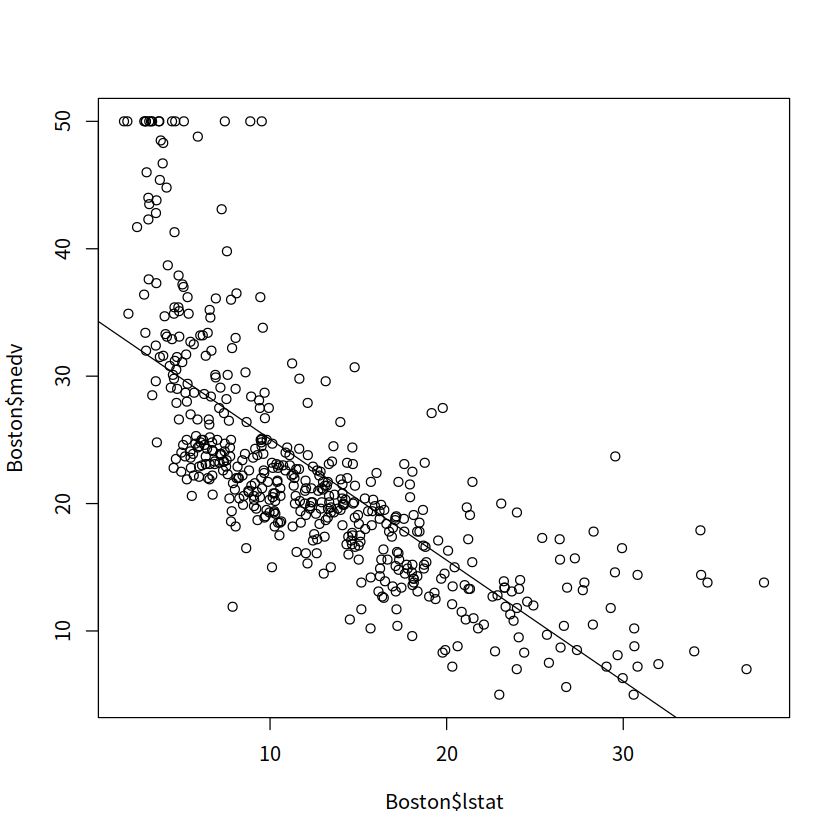

In [14]:
plot(Boston$lstat,Boston$medv)
abline(lm.fit)

给直线加粗或者添加颜色

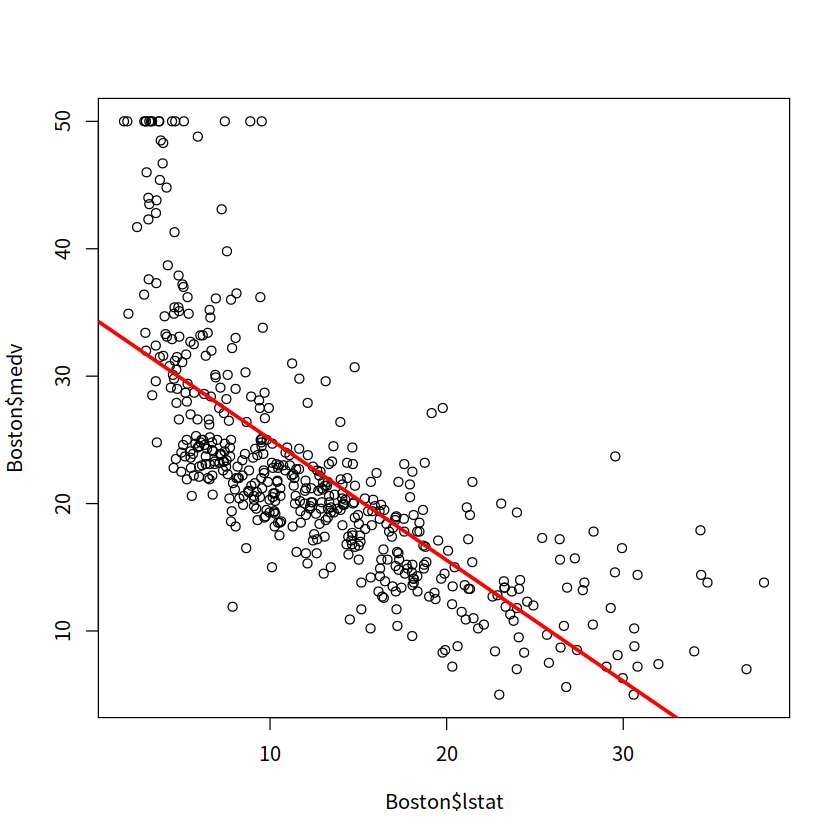

In [15]:
plot(Boston$lstat,Boston$medv)
abline(lm.fit,lwd=3,col="red")

`plot`中的`pch`参数代表了画出的点的形状，具体如下
![UTOOLS1588302281481.png](https://mypictuchuang.oss-cn-shenzhen.aliyuncs.com/UTOOLS1588302281481.png)

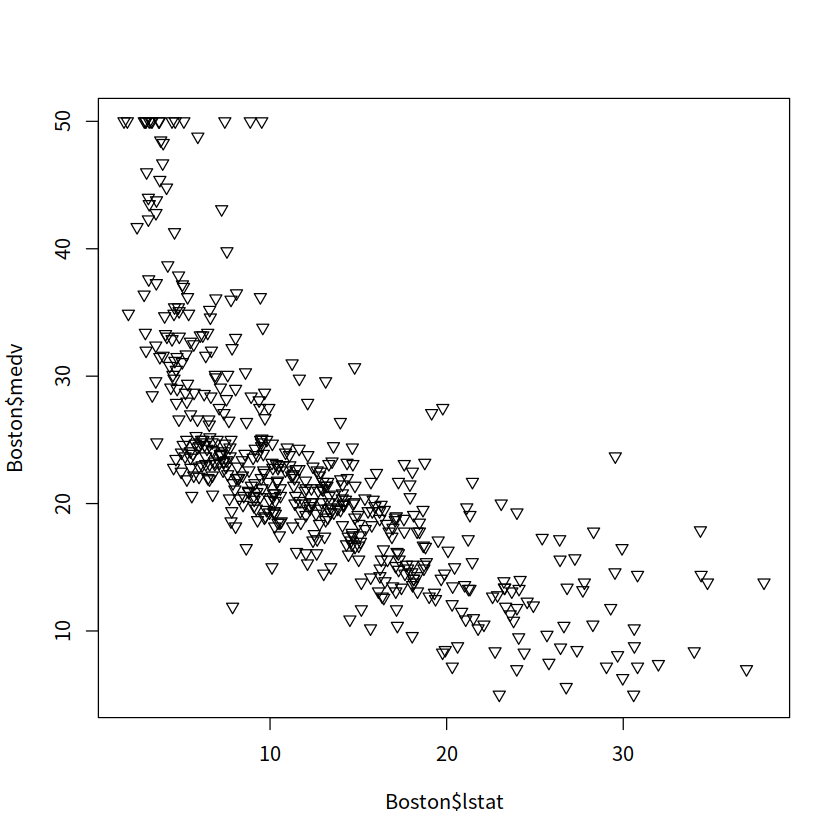

In [16]:
plot(Boston$lstat,Boston$medv,pch=25)

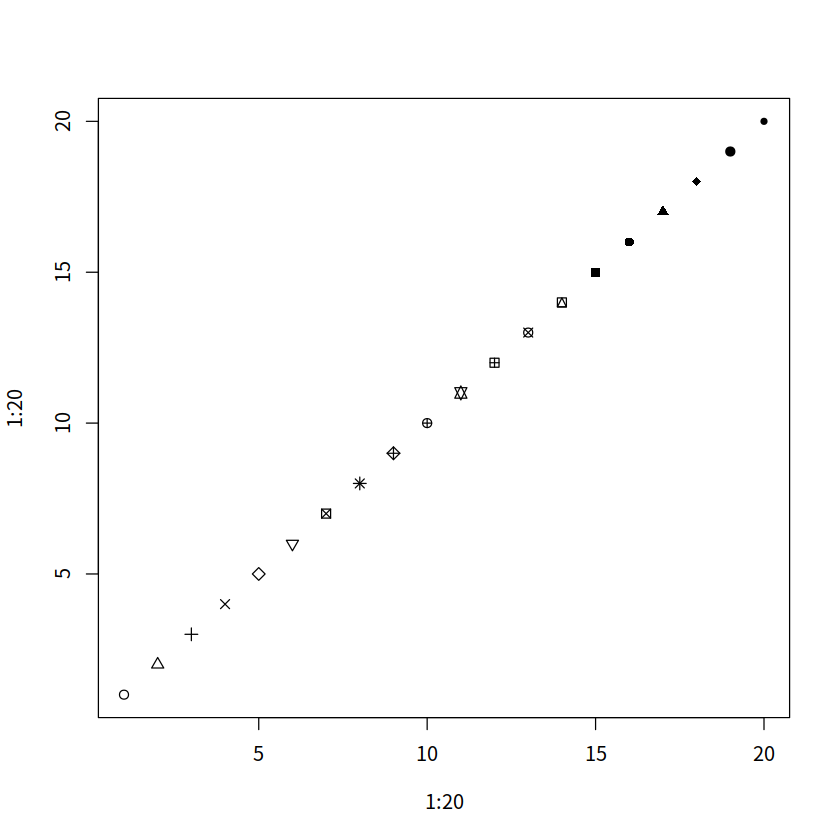

In [17]:
plot(1:20,1:20,pch=1:20)

画出线性回归结果诊断图，包括   
1. 拟合数跟残差的关系图，较好的线性拟合应该会在此图中得到水平的直线   
2. 标准化残差与正态分布的QQ图，较好的线性拟合应该是一条直线    
3. 规模定位图或者点差位置图，较好的线性拟合应该是一条水平的直线    
4. 残差与杠杆图，帮助确定模型上有影响力的数据点，库克距离线(cook's distance)只之外的点是对模型有影响的点

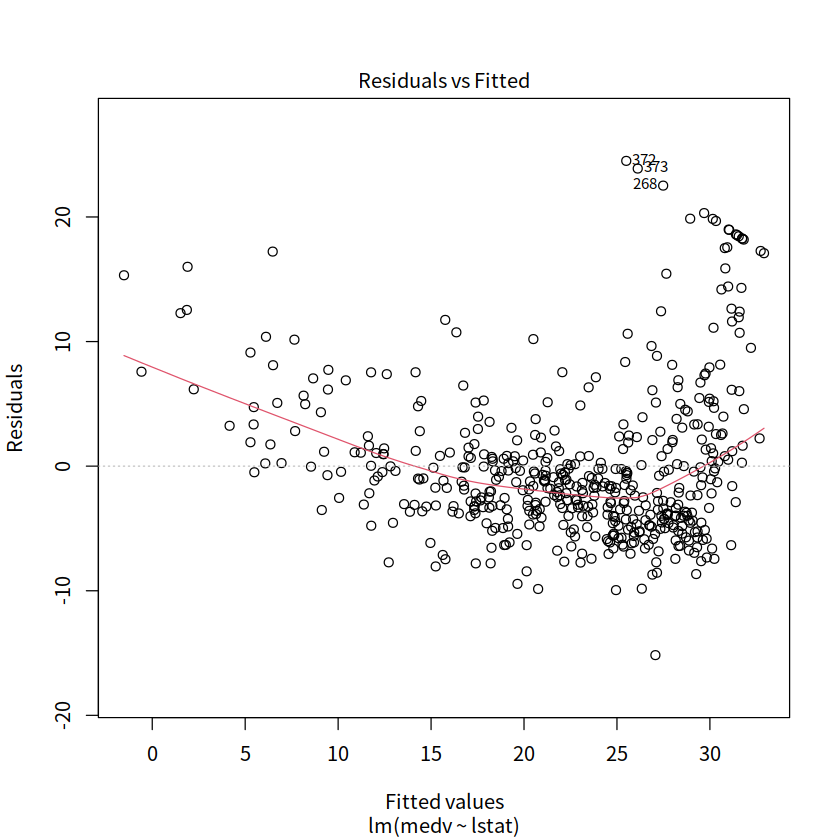

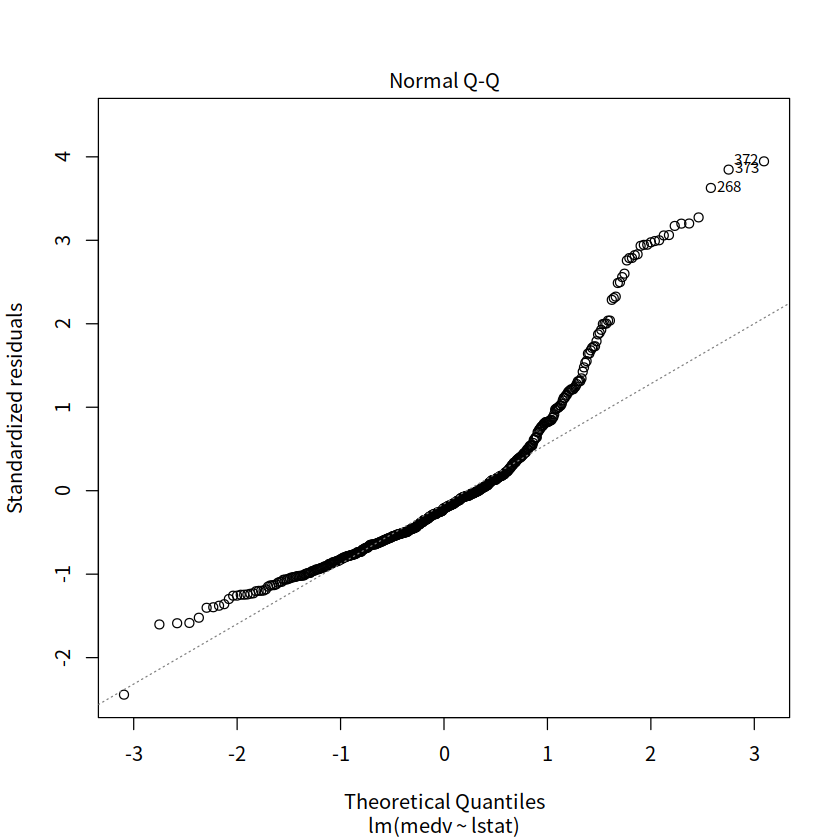

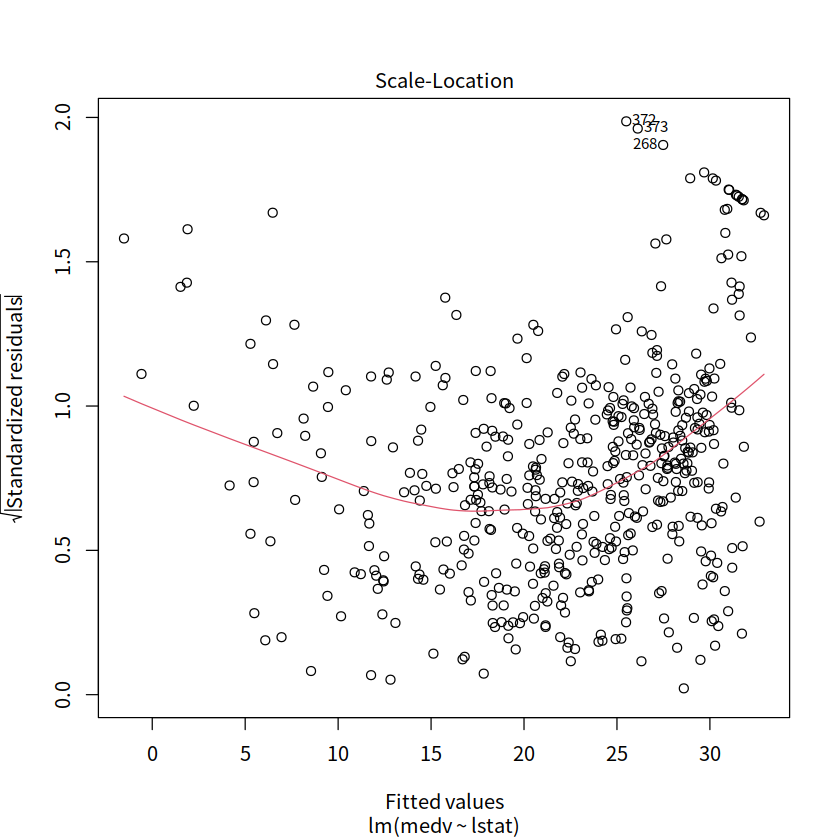

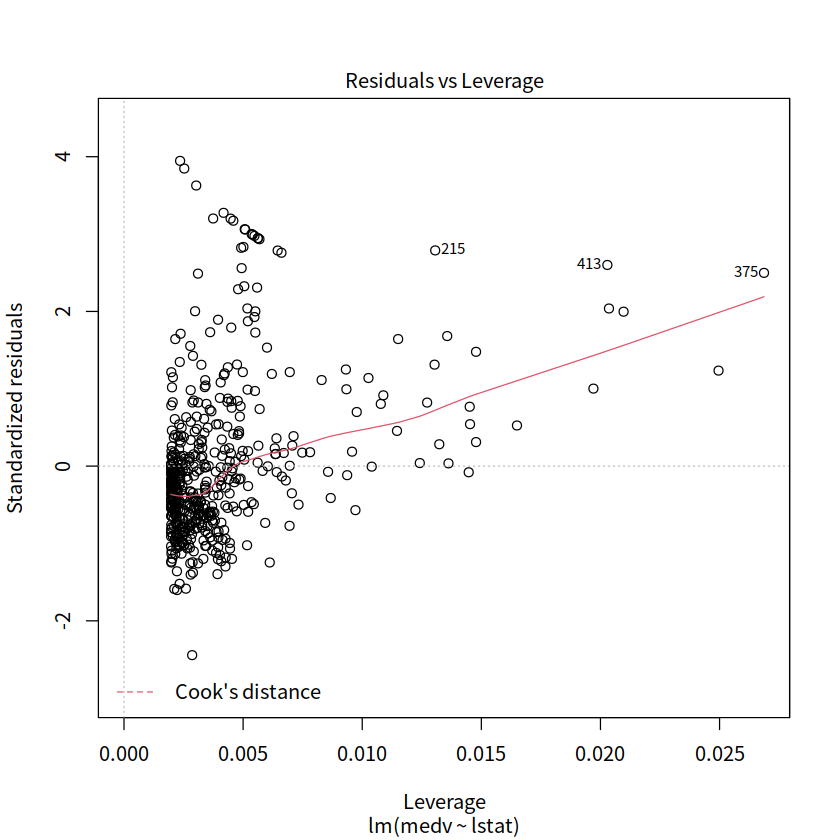

In [18]:
plot(lm.fit)

按照2 × 2的结构画成子图

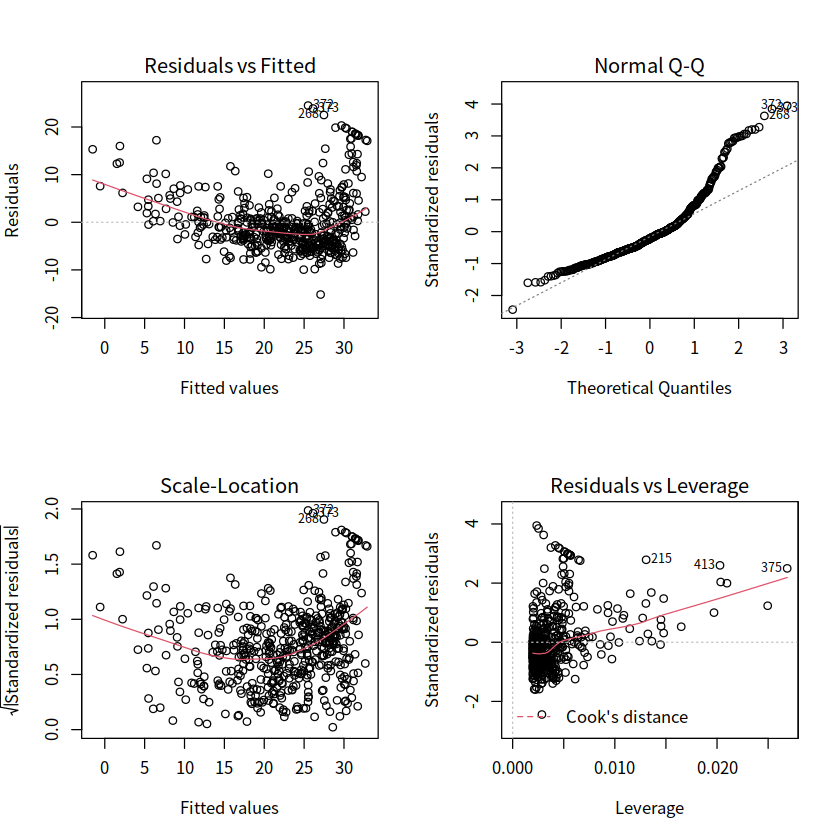

In [19]:
par(mfrow=c(2,2)) 
plot(lm.fit)

画诊断图中的第一个图

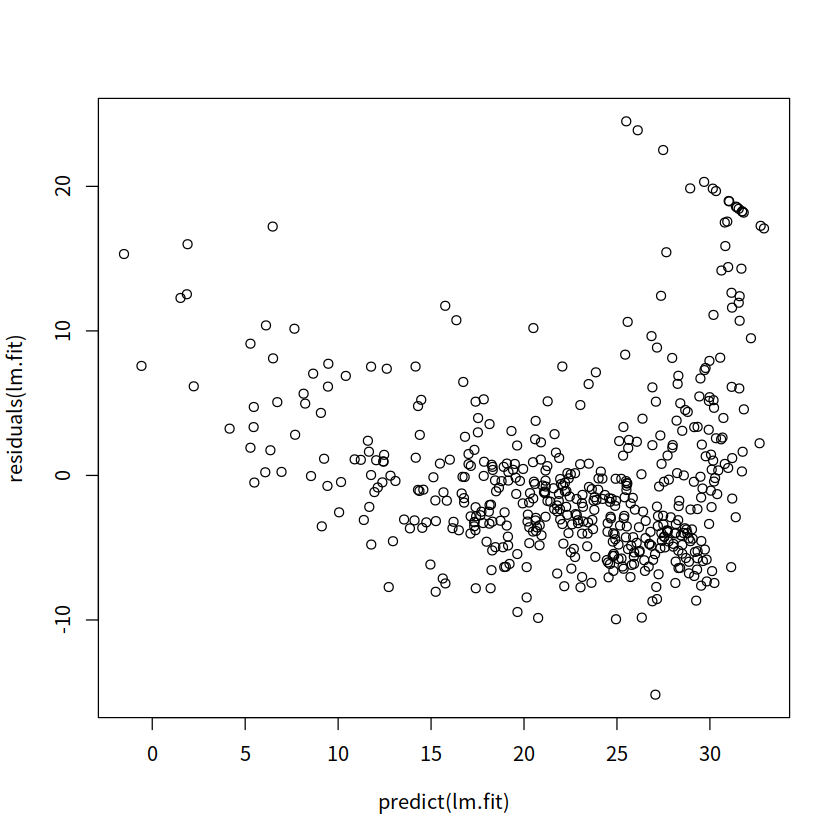

In [20]:
par(mfrow=c(1,1))
plot(predict(lm.fit), residuals(lm.fit))

画拟合值和[学生化残差](https://en.wikipedia.org/wiki/Studentized_residual)之间的关系，学生化残差是残差除以其标准偏差的估计所得的商，是学生统计量的一种

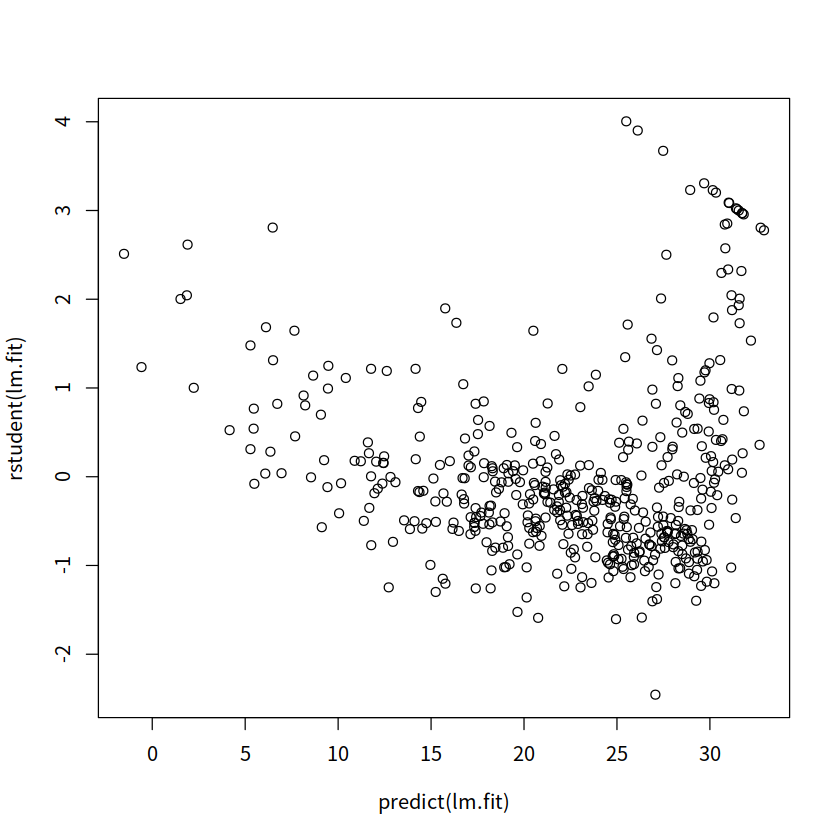

In [21]:
plot(predict(lm.fit), rstudent(lm.fit))

leverage是衡量一个观察值的独立变量值与其他观察值的相距多远的度量，`hatvalues()`以获得杠杆统计的结果

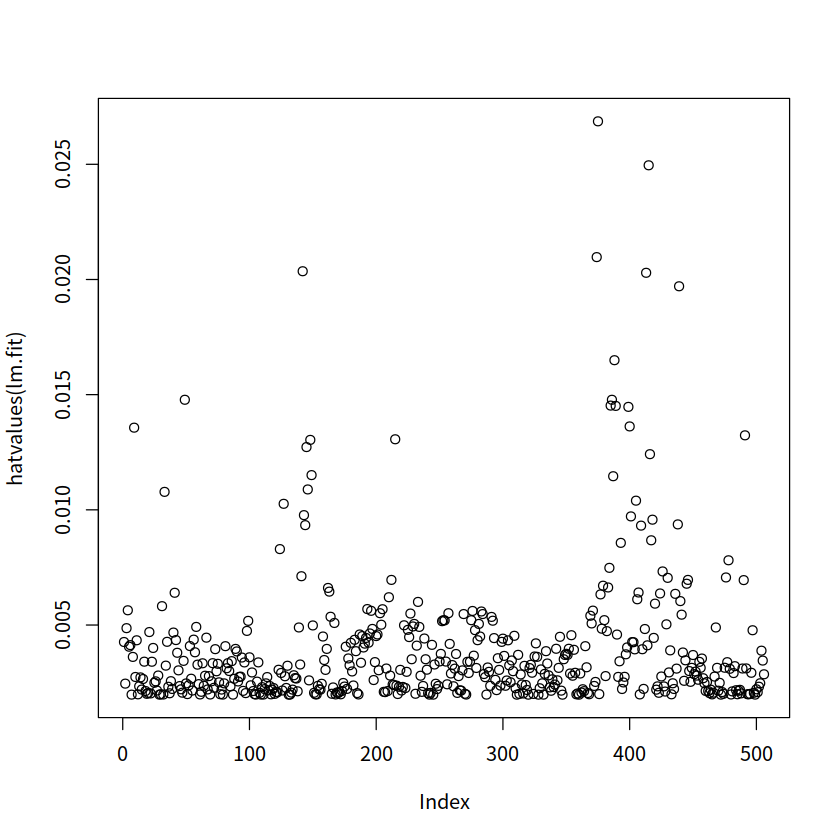

In [22]:
plot(hatvalues(lm.fit))

找到最大杠杆点的索引

In [23]:
which.max(hatvalues(lm.fit))

375 
375

# 多元线性回归

In [24]:
lm.fit=lm(medv~lstat+age,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


使用一个因变量和其他所有自变量回归

In [25]:
lm.fit=lm(medv~.,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

获得回归的$R^2$

In [26]:
summary(lm.fit)$r.sq

[1] 0.7406427

获得相对标准误差（Relative Standard Error，RSE）

$$
\mathrm{RSE}=\frac{Standard Error}{Estimate}
$$

Standard Error为样本的标准误，Estimate为样本的均值

In [27]:
summary(lm.fit)$sigma 

[1] 4.745298

排除某一个变量并做回归

In [28]:
lm.fit1=lm(medv~.-age,data=Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

也可以用`update()`函数来更新之前的模型

In [29]:
lm.fit1=update(lm.fit, ~.-age)
lm.fit1


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + dis + 
    rad + tax + ptratio + black + lstat, data = Boston)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  36.436927    -0.108006     0.046334     0.020562     2.689026   -17.713540  
         rm          dis          rad          tax      ptratio        black  
   3.814394    -1.478612     0.305786    -0.012329    -0.952211     0.009321  
      lstat  
  -0.523852  


使用`*`以包括交互项

In [30]:
summary(lm(medv~lstat*age,data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


使用`*`以只对交互项回归

In [31]:
summary(lm(medv~lstat:age,data=Boston))


Call:
lm(formula = medv ~ lstat:age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.347  -4.372  -1.534   1.914  27.193 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.1588631  0.4828240   62.46   <2e-16 ***
lstat:age   -0.0077146  0.0003799  -20.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.827 on 504 degrees of freedom
Multiple R-squared:  0.4501,	Adjusted R-squared:  0.449 
F-statistic: 412.4 on 1 and 504 DF,  p-value: < 2.2e-16


# 加入解释变量的非线性项

函数`I()`将项包装起来

In [32]:
lm.fit2=lm(medv~lstat+I(lstat^2),data = Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


`anova()`函数对两个模型进行方差分析

In [33]:
lm.fit=lm(medv~lstat,data = Boston)
lm.fit
anova(lm.fit,lm.fit2)


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


使用`poly()`以获得高阶多项式

In [34]:
lm.fit5=lm(medv~poly(lstat,5),data = Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


# 定性预测因子

查看Carseats数据的变量

In [35]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [36]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [37]:
summary(Carseats$ShelveLoc)

Bad   Good Medium 
    96     85    219

In [38]:
lm.fit=lm(Sales~.+Income:Advertising+Price:Age,data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

当我们对类型变量回归时，会自动生产虚拟变量，比如：

In [39]:
lm.fit=lm(Sales~.+Income:Advertising+Price:Age,data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

用`contrasts()`函数以得到R生产的虚拟变量的具体情况

In [40]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


这表示，截距项包含了`Bad`的对被解释变量的影响，`ShelveLocGood`系数的含义是`Good`与`Bad`的差异，`ShelveLocMedium`系数的含义是`Medium`与`Bad`的差异